In [1]:
!pip install kaggle

In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [7]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5])

['with_mask_794.jpg', 'with_mask_740.jpg', 'with_mask_199.jpg', 'with_mask_369.jpg', 'with_mask_1136.jpg']
with_mask_1161.jpg


In [8]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5])

['without_mask_1695.jpg', 'without_mask_2654.jpg', 'without_mask_1141.jpg', 'without_mask_283.jpg', 'without_mask_2238.jpg']
without_mask_2455.jpg


In [9]:
print('number of with mask images:',len(with_mask_files))
print('number of without mask images:',len(without_mask_files))

number of with mask images: 3725
number of without mask images: 3828


In [10]:
with_mask_labels = [1]*3725
without_mask_labels = [0]*3828

In [11]:
labels = with_mask_labels + without_mask_labels
print(len(labels))
print(labels[:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


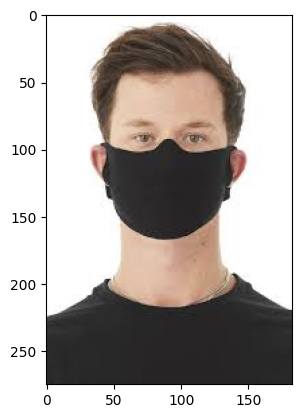

In [12]:
img = mpimg.imread('/content/data/with_mask/with_mask_794.jpg')
imgplot = plt.imshow(img)
plt.show()

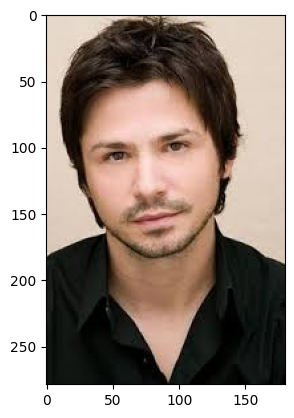

In [13]:
img = mpimg.imread('/content/data/without_mask/without_mask_2654.jpg')
imgplot = plt.imshow(img)
plt.show()

In [14]:
with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [15]:
print(len(data))

7553


array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[ 41,  41,  41],
        [ 42,  42,  42],
        [ 42,  42,  42],
        ...,
        [ 40,  40,  40],
        [ 40,  40,  40],
        [ 40,  40,  40]],

       [[ 42,  42,  42],
        [ 42,  42,  42],
        [ 41,  41,  41],
        ...,
        [ 40,  40,  40],
        [ 40,  40,  40],
        [ 40,  40,  40]],

       [[ 44,  44,  44],
        [ 42,  42,  42],
        [ 40,  40,  40],
        ...,
        [ 40,  40,  40],
        [ 40,  40,  40],
        [ 40,  40,  40]]], dtype=uint8)
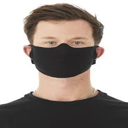

In [16]:
data[0]

In [17]:
type(data[0])

numpy.ndarray

In [18]:
data[0].shape

(128, 128, 3)

In [19]:
X = np.array(data)
Y = np.array(labels)

In [20]:
type(X)

numpy.ndarray

In [21]:
type(Y)

numpy.ndarray

In [22]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state=2)

In [24]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

array([[[209, 209, 197],
        [209, 209, 197],
        [209, 209, 197],
        ...,
        [223, 224, 219],
        [221, 222, 217],
        [222, 223, 218]],

       [[208, 208, 196],
        [208, 208, 196],
        [208, 208, 196],
        ...,
        [225, 226, 221],
        [225, 226, 221],
        [225, 226, 221]],

       [[210, 210, 198],
        [210, 210, 198],
        [210, 210, 198],
        ...,
        [225, 226, 221],
        [226, 227, 222],
        [225, 226, 221]],

       ...,

       [[177, 182, 185],
        [172, 177, 180],
        [173, 178, 181],
        ...,
        [200, 210, 214],
        [203, 212, 218],
        [205, 213, 217]],

       [[175, 180, 183],
        [176, 181, 184],
        [178, 183, 186],
        ...,
        [180, 195, 206],
        [188, 201, 212],
        [191, 205, 215]],

       [[148, 153, 156],
        [168, 173, 176],
        [175, 180, 183],
        ...,
        [167, 185, 199],
        [170, 186, 200],
        [171, 187, 200]]], dtype=uint8)
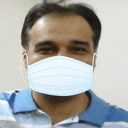

In [25]:
X_train[0]

In [26]:
X_train_scaled[0]

array([[[0.81960784, 0.81960784, 0.77254902],
        [0.81960784, 0.81960784, 0.77254902],
        [0.81960784, 0.81960784, 0.77254902],
        ...,
        [0.8745098 , 0.87843137, 0.85882353],
        [0.86666667, 0.87058824, 0.85098039],
        [0.87058824, 0.8745098 , 0.85490196]],

       [[0.81568627, 0.81568627, 0.76862745],
        [0.81568627, 0.81568627, 0.76862745],
        [0.81568627, 0.81568627, 0.76862745],
        ...,
        [0.88235294, 0.88627451, 0.86666667],
        [0.88235294, 0.88627451, 0.86666667],
        [0.88235294, 0.88627451, 0.86666667]],

       [[0.82352941, 0.82352941, 0.77647059],
        [0.82352941, 0.82352941, 0.77647059],
        [0.82352941, 0.82352941, 0.77647059],
        ...,
        [0.88235294, 0.88627451, 0.86666667],
        [0.88627451, 0.89019608, 0.87058824],
        [0.88235294, 0.88627451, 0.86666667]],

       ...,

       [[0.69411765, 0.71372549, 0.7254902 ],
        [0.6745098 , 0.69411765, 0.70588235],
        [0.67843137, 0

In [27]:
import tensorflow as tf
from tensorflow import keras

In [28]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = ['acc'])

In [30]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 16s 56ms/step - acc: 0.6661 - loss: 0.8140 - val_acc: 0.8793 - val_loss: 0.3251
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - acc: 0.8752 - loss: 0.3205 - val_acc: 0.9058 - val_loss: 0.2638
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - acc: 0.8811 - loss: 0.3007 - val_acc: 0.9025 - val_loss: 0.2644
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - acc: 0.9133 - loss: 0.2300 - val_acc: 0.9091 - val_loss: 0.2508
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - acc: 0.9243 - loss: 0.1955 - val_acc: 0.9041 - val_loss: 0.2345


In [31]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - acc: 0.9162 - loss: 0.2351
Test Accuracy = 0.9073461294174194


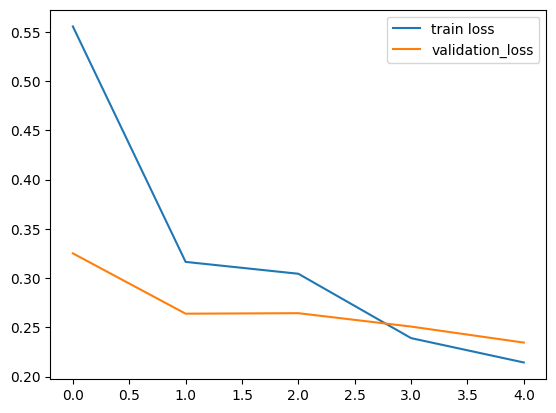

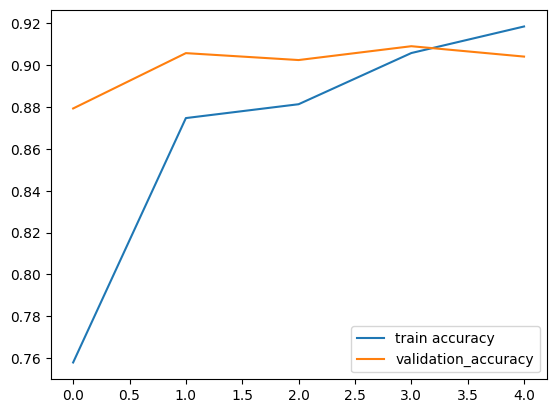

In [32]:
h = history

plt.plot(h.history['loss'], label = 'train loss')
plt.plot(h.history['val_loss'], label='validation_loss')
plt.legend()
plt.show()

plt.plot(h.history['acc'], label = 'train accuracy')
plt.plot(h.history['val_acc'], label='validation_accuracy')
plt.legend()
plt.show()


Path of the image to be predicted: /content/test3.jpeg


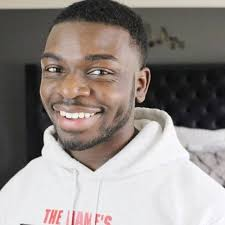

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
[[0.58815783 0.2996674 ]]
0
The person in the image is not wearing a mask.


In [37]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled,[1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 1:
  print('The person in the image is wearing a mask.')

else:
  print('The person in the image is not wearing a mask.')
